# Exercise 1.4.1

print the following pattern (using loops)

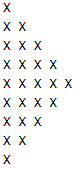

In [1]:
def ex_1():
    
    for i in range(6):
        print("x"*i)
    
    for i in range(6):
        print("x"*(6-i))

ex_1()


x
xx
xxx
xxxx
xxxxx
xxxxxx
xxxxx
xxxx
xxx
xx
x


# Exercise 1.4.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [2]:
def ex_2(input_string):

    img_arr = []
    for c in input_str:
        try:
            num = float(c)
            img_arr.append(num)
        except:
            continue

    return sum(img_arr)

input_str = "n45as29@#8ss6"
ex_2(input_str)

34.0

# Exercise 1.4.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [3]:
def num_to_bin(num=0):

    x = num
    out_bin = []
    while True:
        if x == 0:
            break
        out_bin.append(x % 2)
        x = x // 2

    return '0x' + ''.join(map(str, out_bin[::-1]))

num_to_bin(20)

'0x10100'

# Exercise 1.5-1:

The Fibonacci Sequence is a series of numbers. The next number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The next number in this series above is 8 + 13 = 21



Create a function that takes an integer as an input and returns a list that contains all Fibonacci numbers smaller than the input integer

example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [5]:
def fibonaci(upper_threshold: int) -> list:
  out_fib = []
  for i in range(upper_threshold + 1):
      if (i == 0) or (i == 1):
          out_fib.append(i)
          continue

      out_fib.append(out_fib[i - 2] + out_fib[i - 1])
  return out_fib

fibonaci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

# Exercise 1.5-2:

### Basic:

implement function *display_as_digi* that will print an arbitrary integer in segment display style


example:

*display_as_digi(588)*


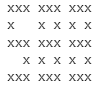

In [6]:
def display_as_digi(number: int) -> None:
    num_to_str = str(number)
    dict1 = {
        '0' : ('###','# #','# #','# #','###'),
        '1' : (' ##','###',' ##',' ##',' ##'),
        '2' : ('###','  #','###','#  ','###'),
        '3' : ('###','  #','###','  #','###'),
        '4' : ('# #','# #','###','  #','  #'),
        '5' : ('###','#  ','###','  #','###'),
        '6' : ('###','#  ','###','# #','###'),
        '7' : ('###','  #','  #','  #','  #'),
        '8' : ('###','# #','###','# #','###'),
        '9' : ('###','# #','###','  #','###'),
        '.' : (' ', ' ', ' ', ' ', '#')
    }
    nums = []
    for row in range(len(dict1['0'])):
        print(" ".join(dict1[i][row] for i in num_to_str))

display_as_digi(1.23456789)

 ##   ### ### # # ### ### ### ### ###
###     #   # # # #   #     # # # # #
 ##   ### ### ### ### ###   # ### ###
 ##   #     #   #   # # #   # # #   #
 ## # ### ###   # ### ###   # ### ###


### Extension

extend our segment number printer to be able to print decimal numbers

# Exercise 2

### 1


- Create a numpy array with shape 5x5, that contains numbers from 25..to 0
- create a function that takes an arbitrary numpy array as an input and sets all numbers smaller than the user-defined threshold to 0
- test your function on your array
- make one implementation using loops and one without using loops, compare execution time with *time* library


In [8]:
import numpy as np

def zero_digits(input_array, treshold=10):

    input_array[input_array < treshold] = 0

    return input_array

def zero_digit_loop(input_array, treshold=10):

    out_arr = np.empty(input_array.shape)

    for i, row in enumerate(input_array):
        row_ed = row
        for index, number in enumerate(row):
            if number < treshold:
                row_ed[index] = 0

        out_arr[i] = np.array(row_ed, dtype=np.uint8)

    return out_arr



In [12]:
import time

array = np.random.randint(0, 25, size=[5, 5])

start = time.time()
array_zer = zero_digits(array)
end = time.time()
print(f"Total time {(end - start):.16f} using numpy only")
print(array_zer)

start = time.time()
array_zer = zero_digit_loop(array)
end = time.time()
print(f"Total time {(end - start):.16f} using loops")
print(array_zer)

Total time 0.0001065731048584 using numpy only
[[ 0  0  0 22  0]
 [12 12  0  0  0]
 [ 0  0  0 23  0]
 [ 0  0 10 19 15]
 [ 0 24 18 13  0]]
Total time 0.0001857280731201 using loops
[[ 0.  0.  0. 22.  0.]
 [12. 12.  0.  0.  0.]
 [ 0.  0.  0. 23.  0.]
 [ 0.  0. 10. 19. 15.]
 [ 0. 24. 18. 13.  0.]]


### 2
 - let's return to our Digi display, and create a function that will take an arbitrary integer as an input and display it as a binary image in segment display style.
*hint: to show an image use the library matplotlib.pyplot, also you will maybe find function np.concatenate useful*

In [20]:
import matplotlib.pyplot as plt
import matplotlib.collections as coll
import matplotlib.patches as patches

def show_in_digi(number: int) -> None:
    numbers = [int(x) for x in str(number)]
    width, height = 1, 1
    digits = np.array([
        [[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]],
        [[0, 1, 1], [1, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1]],
        [[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]],
        [[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]],
        [[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]],
        [[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]],
        [[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]],
        [[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]],
        [[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]],
        [[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]],
        [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1]]
    ], dtype=np.uint8)
    chosen_digits = [digits[number] for number in numbers]

    fig = plt.figure
    ax = plt.subplot(111, aspect='equal')
    pat = []

    for num_index, digit in enumerate(chosen_digits):
        for y_index, row in enumerate(digit[::-1]):
            for x_index, px in enumerate(row):
                if px != 0:
                    sq = patches.Rectangle((x_index + 4*num_index, y_index), width, height, fill=True)
                    ax.add_patch(sq)

    pc = coll.PatchCollection(pat)
    ax.add_collection(pc)
    ax.relim()
    ax.autoscale_view()

    plt.axis('off')
    plt.show() 

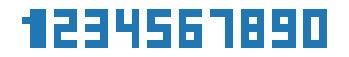

In [21]:
show_in_digi(1234567890)

show_in_digi(5289) will show:


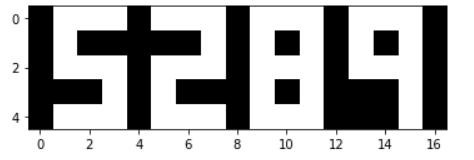

# Exercise 3

Use google colab dataset loaded in the lecture and do following operations:

- check what *dataset.describe()* does

- display all rows where *total_bedrooms* column is bigger than 310

- drop also first and last row

- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset 

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis 

- choose two arbitrary columns and normalize all values inside using min-max normalization:

- Create a Correlation Matrix from all columns 

In [25]:
import pandas as pd

dataset = pd.read_csv('sample_data/california_housing_test.csv')
dataset.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [28]:
result_dataset = dataset[dataset['total_bedrooms'] > 310]
result_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0
...,...,...,...,...,...,...,...,...,...
2990,-118.23,34.09,49.0,1638.0,456.0,1500.0,430.0,2.6923,150000.0
2991,-117.17,34.28,13.0,4867.0,718.0,780.0,250.0,7.1997,253800.0
2993,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048,500001.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0


In [40]:
dataset.drop(dataset.index[1], inplace=True)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0
10,-118.24,33.98,45.0,972.0,249.0,1288.0,261.0,2.2054,125000.0
11,-119.12,35.85,37.0,736.0,166.0,564.0,138.0,2.4167,58300.0
...,...,...,...,...,...,...,...,...,...
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


In [41]:
dataset.drop(dataset.index[-1], inplace=True)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0
10,-118.24,33.98,45.0,972.0,249.0,1288.0,261.0,2.2054,125000.0
11,-119.12,35.85,37.0,736.0,166.0,564.0,138.0,2.4167,58300.0
...,...,...,...,...,...,...,...,...,...
2993,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048,500001.0
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0


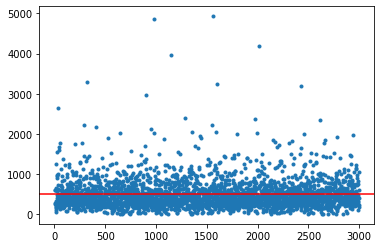

In [50]:
x = dataset["households"].mean()
plt.plot(dataset['households'], '.')
plt.axhline(y=x, color='r', linestyle="-")

In [57]:
for column in dataset.columns:
  mean_value = dataset[column].mean()

  dataset[column].fillna(value=mean_value, inplace=True)

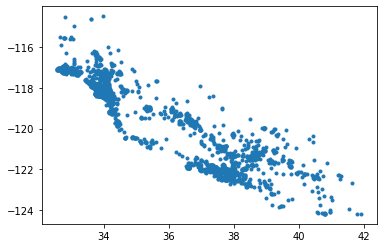

In [60]:
plt.plot(dataset['latitude'], dataset['longitude'], '.')

In [63]:
dataset['latitude'] = dataset['latitude'] / dataset['latitude'].sum()
dataset['population'] = dataset['population'] / dataset['population'].sum()
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-118.30,0.000321,43.0,1510.0,310.0,0.000193,277.0,3.5990,176500.0
8,-122.84,0.000360,15.0,3080.0,617.0,0.000344,599.0,3.6696,194400.0
9,-118.02,0.000320,31.0,2402.0,632.0,0.000674,603.0,2.3333,164200.0
10,-118.24,0.000319,45.0,972.0,249.0,0.000307,261.0,2.2054,125000.0
11,-119.12,0.000336,37.0,736.0,166.0,0.000134,138.0,2.4167,58300.0
...,...,...,...,...,...,...,...,...,...
2993,-117.91,0.000315,37.0,2088.0,510.0,0.000160,390.0,5.1048,500001.0
2994,-117.93,0.000318,35.0,931.0,181.0,0.000123,174.0,5.5867,182500.0
2995,-119.86,0.000323,23.0,1450.0,642.0,0.000299,607.0,1.1790,225000.0
2996,-118.14,0.000320,27.0,5257.0,1082.0,0.000832,1036.0,3.3906,237200.0


In [64]:
corrM = dataset.corr()
corrM

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925169,-0.064482,0.050523,0.071648,0.112358,0.051828,-0.018995,-0.050992
latitude,-0.925169,1.000000,-0.025346,-0.039904,-0.068720,-0.117829,-0.068780,-0.071179,-0.137474
housing_median_age,-0.064482,-0.025346,1.000000,-0.367709,-0.322894,-0.299512,-0.304875,-0.144963,0.091369
total_rooms,0.050523,-0.039904,-0.367709,1.000000,0.937714,0.838671,0.914029,0.221541,0.160379
total_bedrooms,0.071648,-0.068720,-0.322894,0.937714,1.000000,0.856151,0.970707,0.024217,0.082401
population,0.112358,-0.117829,-0.299512,0.838671,0.856151,1.000000,0.895352,0.032674,-0.001218
households,0.051828,-0.068780,-0.304875,0.914029,0.970707,0.895352,1.000000,0.048877,0.100342
median_income,-0.018995,-0.071179,-0.144963,0.221541,0.024217,0.032674,0.048877,1.000000,0.671238
median_house_value,-0.050992,-0.137474,0.091369,0.160379,0.082401,-0.001218,0.100342,0.671238,1.000000
